In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

from PIL import Image
import PIL

import glob

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size, Image.ANTIALIAS)
		new_img.save(img, "JPEG")

In [3]:
gawebawebo = ['/scissor', '/paper', '/rock']

# transfomation of data size
for gbb in gawebawebo:
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper" + gbb
    resize_images(image_dir_path)
    print(gbb[1:], "images resized.")

print('\ntest data')
for gbb in gawebawebo:
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test" + gbb
    resize_images(image_dir_path)
    print(gbb[1:], "images resized.")

scissor images resized.
paper images resized.
rock images resized.

test data
scissor images resized.
paper images resized.
rock images resized.


In [4]:
def load_data(img_path, number_of_data=300):
    
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32)\
    .reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   
        idx=idx+1
        
    return imgs, labels

In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0
print(x_train_norm.shape)

(300, 28, 28, 3)


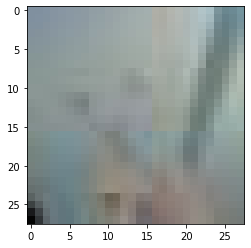

In [6]:
# 아니 왜 핑핑이가?
plt.imshow(x_train[77])
plt.show()

In [7]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=9

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='gelu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='gelu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='gelu'))
model.add(keras.layers.Dense(3, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/9
10/10 [==============================] - 1s 29ms/step - loss: 1.1097 - accuracy: 0.3033
Epoch 2/9
10/10 [==============================] - 0s 30ms/step - loss: 1.0920 - accuracy: 0.4200 0s - loss: 1.0916 - accuracy: 
Epoch 3/9
10/10 [==============================] - 0s 30ms/step - loss: 1.0957 - accuracy: 0.3500
Epoch 4/9
10/10 [==============================] - 0s 31ms/step - loss: 1.0798 - accuracy: 0.4000
Epoch 5/9
10/10 [==============================] - 0s 30ms/step - loss: 1.0692 - accuracy: 0.7267
Epoch 6/9
10/10 [==============================] - 0s 30ms/step - loss: 1.0462 - accuracy: 0.7767
Epoch 7/9
10/10 [==============================] - 0s 30ms/step - loss: 1.0126 - accuracy: 0.5733
Epoch 8/9
10/10 [==============================] - 0s 30ms/step - loss: 0.9134 - accuracy: 0.7433
Epoch 9/9
10/10 [==============================] - 0s 27ms/step - loss: 0.7142 - accuracy: 0.7900


## layer, filter, dense parameter
손글씨 숫자 판별의 sequential layer과 비교했을 때,
 1. 사람의 손에서 특징 추출 -> convultion layer 추가: 2층 -> 3층
 2. filter 역시 추가: (16, 32) -> (64, 128)
 3. 그러나 클래스의 수는 줄었고, digit 구별에서 32는 적다는 느낌을 받았음으로 dense는 유지: (32, 10) -> (32, 3)
 4. 초기 완전히 예측하지 못했던 정확성을 학습 빈도를 올림에 따라 지속적으로 상승함: 10 -> 25 # overfitting을 막기 위해서 적당한 값 산정
 
추가로 relu 대신해서 요즘 핫한 gelu로 활성화함수를 선택하였습니다.

In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0
x_test_norm.shape

(300, 28, 28, 3)

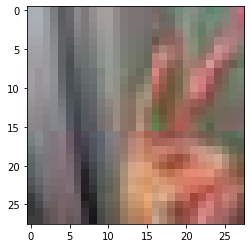

In [11]:
# test의 이미지; 비교적 선명하다
plt.imshow(x_test[0])
plt.show()

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.0999 - accuracy: 0.2567
test_loss: 2.099944591522217 
test_accuracy: 0.2566666603088379


In [13]:
# 놀랍게도 찌묵빠 그대로
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [14]:
# 모델이 예측한 정답; 0: 찌, 1: 묵, 2: 빠
np.argmax(model.predict(x_test_norm), axis=1)

array([2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
# 빠와 찌만 예측함으로 합하여 사이즈로 나눈 값; 빠와 찌의 비율을 알 수 있다.
np.sum(np.argmax(model.predict(x_test_norm), axis=1))/300

0.56

In [16]:
# 모델의 output layer. 당당히 오답을 말하고 있다.
np.around(model.predict(x_test_norm), 2)

array([[0.02, 0.08, 0.9 ],
       [0.93, 0.02, 0.05],
       [0.1 , 0.04, 0.85],
       [0.75, 0.02, 0.23],
       [0.89, 0.03, 0.08],
       [0.35, 0.18, 0.47],
       [0.86, 0.04, 0.1 ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.97, 0.01, 0.01],
       [0.99, 0.01, 0.  ],
       [0.9 , 0.04, 0.06],
       [0.09, 0.33, 0.58],
       [0.16, 0.05, 0.79],
       [0.99, 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.1 , 0.32, 0.58],
       [0.33, 0.04, 0.63],
       [0.92, 0.03, 0.06],
       [0.03, 0.02, 0.94],
       [0.91, 0.03, 0.07],
       [0.06, 0.18, 0.77],
       [0.98, 0.01, 0.01],
       [0.01, 0.03, 0.97],
       [0.99, 0.01, 0.  ],
       [0.98, 0.01, 0.01],
       [0.22, 0.04, 0.73],
       [0.04, 0.11, 0.85],
       [0.2 , 0.03, 0.77],
       [1.  , 0.  , 0.  ],
       [0.91, 0.02, 0.07],
       [0.01, 0.05, 0.94],
       [0.99, 0.  , 0.01],
       [0.09, 0.32, 0.59],
       [0.95, 0.01, 0.04],
       [0.98, 0.  , 0.02],
       [0.99, 0.01, 0.  ],
 

첫 모델은 묵은 전혀 예측하지 못하고 있다.  
그리고 찌와 빠의 비율은 거의 3:1 이며 이는 찍는 수준보다도 못하다.

In [17]:
filter_ = np.argmax(model.predict(x_test_norm), axis=1) != y_test
data = np.around(model.predict(x_test_norm), 2)[filter_]

In [18]:
# 오답을 출력한 row만
data

array([[0.02, 0.08, 0.9 ],
       [0.1 , 0.04, 0.85],
       [0.35, 0.18, 0.47],
       [0.09, 0.33, 0.58],
       [0.16, 0.05, 0.79],
       [0.1 , 0.32, 0.58],
       [0.33, 0.04, 0.63],
       [0.03, 0.02, 0.94],
       [0.06, 0.18, 0.77],
       [0.01, 0.03, 0.97],
       [0.22, 0.04, 0.73],
       [0.04, 0.11, 0.85],
       [0.2 , 0.03, 0.77],
       [0.01, 0.05, 0.94],
       [0.09, 0.32, 0.59],
       [0.18, 0.26, 0.56],
       [0.24, 0.04, 0.72],
       [0.01, 0.04, 0.95],
       [0.02, 0.09, 0.89],
       [0.01, 0.05, 0.94],
       [0.12, 0.02, 0.86],
       [0.37, 0.18, 0.45],
       [0.01, 0.06, 0.92],
       [0.36, 0.2 , 0.44],
       [0.13, 0.04, 0.83],
       [0.07, 0.02, 0.91],
       [0.14, 0.04, 0.82],
       [0.1 , 0.04, 0.85],
       [0.13, 0.31, 0.56],
       [0.01, 0.02, 0.97],
       [0.01, 0.04, 0.95],
       [0.09, 0.29, 0.62],
       [0.01, 0.04, 0.95],
       [0.2 , 0.02, 0.78],
       [0.2 , 0.04, 0.76],
       [0.14, 0.04, 0.82],
       [0.17, 0.05, 0.79],
 

오답 row를 출력함으로 알 수 있는 사실은  
___모델은 전혀 특성을 잡지 못하였으며, 오답에 대한 확신을 100% 근접하게 하거나 빠 혹은 찌로 쏠렸다.___


In [19]:
n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='gelu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='gelu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='gelu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
10/10 [==============================] - 1s 53ms/step - loss: 1.1027 - accuracy: 0.3533
Epoch 2/10
10/10 [==============================] - 1s 53ms/step - loss: 1.0713 - accuracy: 0.4067
Epoch 3/10
10/10 [==============================] - 1s 50ms/step - loss: 1.0536 - accuracy: 0.3833
Epoch 4/10
10/10 [==============================] - 1s 50ms/step - loss: 0.9696 - accuracy: 0.7933
Epoch 5/10
10/10 [==============================] - 1s 54ms/step - loss: 0.8353 - accuracy: 0.7800
Epoch 6/10
10/10 [==============================] - 1s 53ms/step - loss: 0.6870 - accuracy: 0.7500
Epoch 7/10
10/10 [==============================] - 1s 51ms/step - loss: 0.4807 - accuracy: 0.8500
Epoch 8/10
10/10 [==============================] - 1s 53ms/step - loss: 0.4459 - accuracy: 0.7967
Epoch 9/10
10/10 [==============================] - 1s 54ms/step - loss: 0.3382 - accuracy: 0.8900
Epoch 10/10
10/10 [==============================] - 1s 51ms/step - loss: 0.2527 - accuracy: 0.9267
10/10 - 0

여러 패러미터를 조절해본 결과  
#### 너무 깨지는 이미지에 적절한 특성을 파악하지 못하는 것으로 판단했다.
나는 위 이미지에 가위라는 것에 십만원 걸라고 하면 못 걸겠다.  
사람이 판단하기에도 애매하다면 이미지가 틀린 것이라 본다.

이미지 모듈에서 필터를 기본값이 아닌 다른 값으로도 해보았지만 이미지가 깨지는 것은 여전했다.  
터미널의 다음의 입력으로 새로운 사이즈의 그림을 만들기로 한다.

cd /aiffel/aiffel/rock_scissor_paper  
pwd  
mkdir yo  
mv data.zip yo  
cd yo  
unzip data.zip  

In [20]:
def resize_images_2(img_path):
	images=glob.glob(img_path + "/*.jpg")
	target_size=(114,114)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size, Image.ANTIALIAS)
		new_img.save(img, "JPEG")

In [21]:
# transfomation of data size
for gbb in gawebawebo:
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/yo" + gbb
    resize_images_2(image_dir_path)
    print(gbb[1:], "images resized.")

print('\ntest data')
for gbb in gawebawebo:
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/yo/test" + gbb
    resize_images_2(image_dir_path)
    print(gbb[1:], "images resized.")

scissor images resized.
paper images resized.
rock images resized.

test data
scissor images resized.
paper images resized.
rock images resized.


In [22]:
def load_data_2(img_path, number_of_data=300):
    
    img_size=114
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32)\
    .reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   
        idx=idx+1
        
    return imgs, labels

In [23]:
# 트레이닝 데이터
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/yo"
(x_train, y_train)=load_data_2(image_dir_path)
x_train_norm = x_train/255.0

# 테스트 데이터
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/yo/test"
(x_test, y_test)=load_data_2(image_dir_path)
x_test_norm = x_test/255.0
x_test_norm.shape

(300, 114, 114, 3)

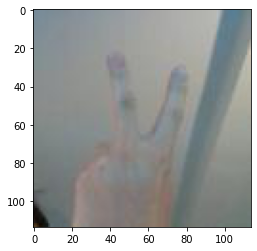

In [24]:
# 이거지!
plt.imshow(x_train[0])
plt.show()

In [25]:
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='gelu', input_shape=(114, 114, 3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='gelu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='gelu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 1.3477 - accuracy: 0.3500
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 1.0994 - accuracy: 0.3800
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 1.0892 - accuracy: 0.3767
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 1.0589 - accuracy: 0.3633
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 1.0175 - accuracy: 0.4800
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.9553 - accuracy: 0.5200
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.8678 - accuracy: 0.5267
Epoch 8/10
10/10 [==============================] - 11s 1s/step - loss: 0.7798 - accuracy: 0.6400
Epoch 9/10
10/10 [==============================] - 11s 1s/step - loss: 0.7132 - accuracy: 0.7000
Epoch 10/10
10/10 [==============================] - 11s 1s/step - loss: 0.6678 - accuracy: 0.6567
10/10 - 3s - loss: 

# 회고

문제점이라고 여겼던 이미지 사이즈를 개선했지만 내가 볼때만 편할 뿐,  
전혀 개선되는 것은 없었다. 이 시점에서 드는 의문은  
  
 -이미지의 사이즈와 컨볼루션 layer층의 depth와 num of filter와 관련이 있을까?  
 -사람이 확인할 수 없는 이미지를 정확히 학습했다면, 데이터-레이블 쌍의 신뢰도는 무엇으로부터 확인할 수 있을까?

이상으로 CNN의 기본 예제를 학습했다. 목표로 하는 정확도는 맞추지 못했지만  
keras의 Sequential 신경망 모델에 layer를 하나하나 추가하는 경험으로 충분하다고 생각한다.  

___추가로 팀원들과 상의하며 나온 얘기들 중에 경미한 outlier에 대한 학습이 완전히 이뤄지는 것은 모델 학습에 좋은 것일까? 하는 문제도 생각해볼만 하다.___  

overfitting에 문제를 야기할 수 있지만 현실세계에서는 다양한 data가 존재하기 때문에  
confusino matrix에서 이야기했던 스팸 걸려낼 때와 암 환자를 구별할 때와 같이  
잘못된 예측을 하더라도 어느 방향으로 초점을 맞춰야 할 지 엔지니어의 판단에 따라 경미한 outlier의 학습 여부가 결정되지 않을까 하며 잠정 결론을 내렸다.
